In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

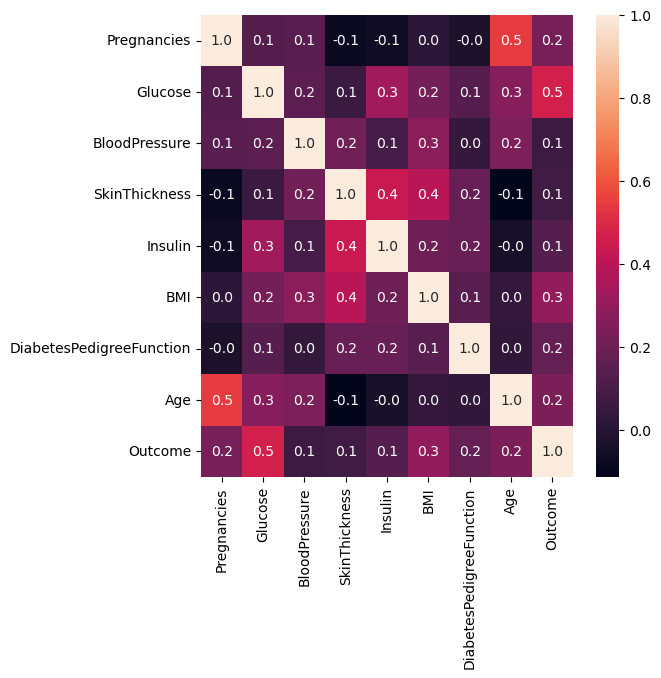

In [7]:
plt.figure(figsize=(6,6))
sns.heatmap(data=df.corr(),annot=True,fmt=".1f")
plt.show()

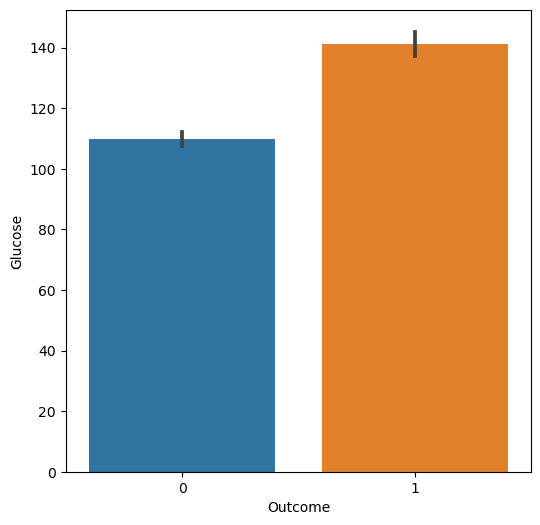

In [9]:
plt.figure(figsize=(6,6))
sns.barplot(data=df,x="Outcome",y="Glucose")
plt.show()

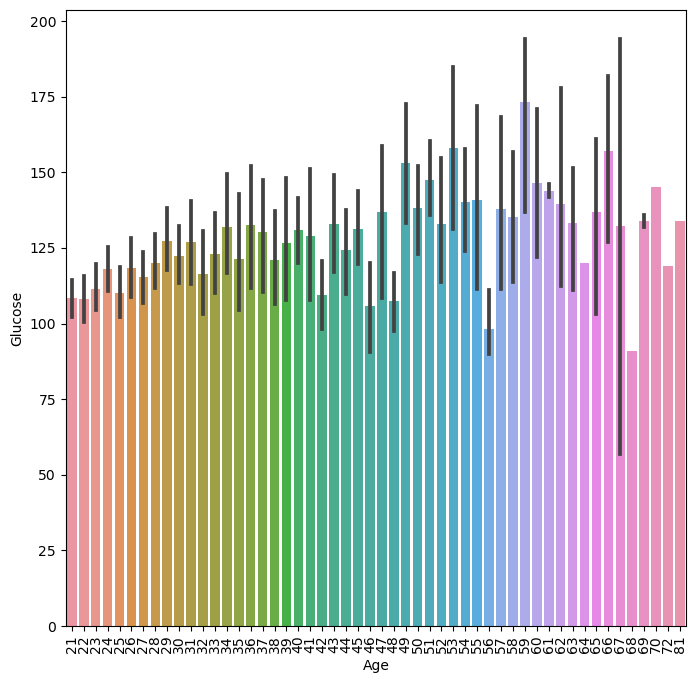

In [12]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,x="Age",y="Glucose")
plt.xticks(rotation=90)
plt.show()

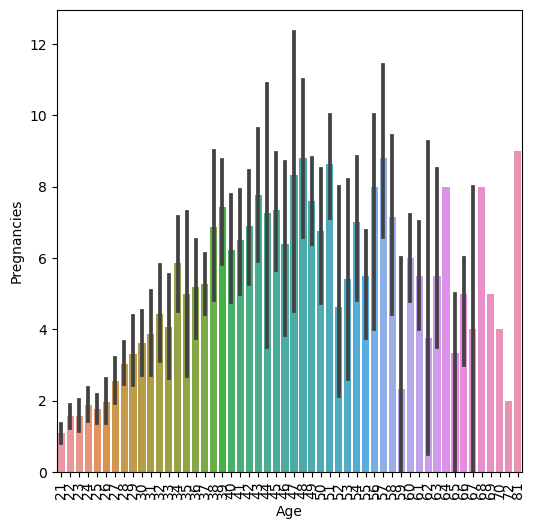

In [14]:
plt.figure(figsize=(6,6))
sns.barplot(data=df,x="Age",y="Pregnancies")
plt.xticks(rotation=90)
plt.show()

In [21]:
X = df.drop(columns="Outcome",axis=1)

In [22]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [23]:
X.shape

(768, 8)

In [24]:
y = df['Outcome']

In [25]:
y.shape

(768,)

In [26]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=7)

In [28]:
classifier = SVC(kernel='linear')

In [29]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [30]:
X_train_pred = classifier.predict(X_train)
X_test_pred = classifier.predict(X_test)
print("Accuracy Score for Training : " , accuracy_score(X_train_pred,y_train) )
print("Accuracy Score for Test : " , accuracy_score(X_test_pred,y_test) )

Accuracy Score for Training :  0.7725694444444444
Accuracy Score for Test :  0.7864583333333334


In [31]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [32]:
import pickle

with open('classifier.pkl' , 'wb') as f:
    pickle.dump(classifier,f)